# U.S. Medical Insurance Costs

## In this project, medical insurance data will be analyzed and modeled to predict cost of insurance based on age. A linear regression model will be used to predict age-dependent cost variance. Analysis will be completed to determine what factor increases insurance costs the most: gender, smoking, or region.

### The goal is to find a model someone could use to input their name, age, region, and smoker status to determine their approximate insurance cost

In [83]:
import csv

with open("insurance.csv") as insurance_stats:
    insurance_stats_dict = csv.DictReader(insurance_stats)
    ages = []
    costs = []
    
    male = {}
    female = {}
    male_ages = []
    female_ages = []
    male_costs = []
    female_costs = []

    smoker = {}
    nonsmoker = {}
    smoker_ages = []
    smoker_costs = []
    nonsmoker_ages = []
    nonsmoker_costs = []

    northeast = {}
    northwest = {}
    southeast = {}
    southwest = {}
    northeast_ages = []
    northeast_costs = []
    northwest_ages = []
    northwest_costs = []
    southeast_ages = []
    southeast_costs = []
    southwest_ages = []
    southwest_costs = []

    index = 0
    for row in insurance_stats_dict:
        float_age = float(row["age"])
        ages.append(float_age)
        float_costs = float(row["charges"])
        costs.append(float_costs)
        if row["sex"] == "female":
            female[index] = row
            float_fem_age = float(row["age"])
            female_ages.append(float_fem_age)
            float_fem_costs = float(row["charges"])
            female_costs.append(float_fem_costs)
        elif row["sex"] == "male":
            male[index] = row
            float_male_ages = float(row["age"])
            male_ages.append(float_male_ages)
            float_male_costs = float(row["charges"])
            male_costs.append(float_male_costs)
        if row["smoker"] == "yes":
            smoker[index] = row
            float_smoker_age = float(row["age"])
            smoker_ages.append(float_fem_age)
            float_smoker_costs = float(row["charges"])
            smoker_costs.append(float_smoker_costs)
        elif row["smoker"] == "no":
            nonsmoker[index] = row
            float_nonsmoker_ages = float(row["age"])
            nonsmoker_ages.append(float_nonsmoker_ages)
            float_nonsmoker_costs = float(row["charges"])
            nonsmoker_costs.append(float_nonsmoker_costs)
        if row["region"] == "northeast":
            northeast[index] = row
            float_ne_age = float(row["age"])
            northeast_ages.append(float_ne_age)
            float_ne_costs = float(row["charges"])
            northeast_costs.append(float_ne_costs)
        elif row["region"] == "northwest":
            northwest[index] = row
            float_nw_age = float(row["age"])
            northwest_ages.append(float_nw_age)
            float_nw_costs = float(row["charges"])
            northwest_costs.append(float_nw_costs)
        elif row["region"] == "southeast":
            southeast[index] = row
            float_se_age = float(row["age"])
            southeast_ages.append(float_se_age)
            float_se_costs = float(row["charges"])
            southeast_costs.append(float_se_costs)
        elif row["region"] == "southwest":
            southwest[index] = row
            float_sw_age = float(row["age"])
            southwest_ages.append(float_sw_age)
            float_sw_costs = float(row["charges"])
            southwest_costs.append(float_sw_costs)

### Visualize Data Before Trying to find a fit

<function matplotlib.pyplot.show(close=None, block=None)>

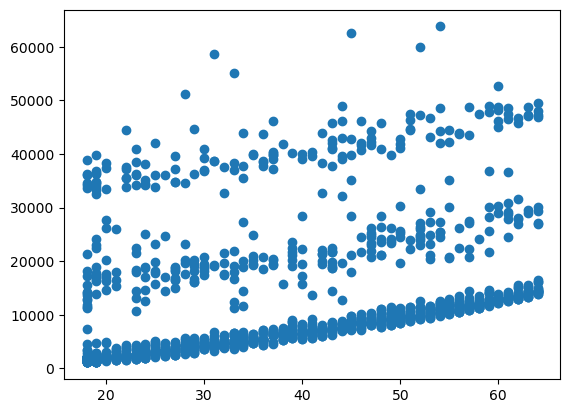

In [84]:
import matplotlib.pyplot as plt
plt.scatter(ages,costs)
plt.show

## The data looks linear
### Try a Linear Regression Model to Fit Insurance Cost By Age

In [85]:
def calculate_linear_error(m,b,point):
    x_age = point[0]
    y_cost = point[1]
    y_calc = m * x_age + b
    error = abs(y_cost-y_calc)
    return error

In [86]:
possible_ms = [m for m in range(0,1000,5)]
possible_bs = [b for b in range(0,1000,5)]
age_cost_datapoints = list(zip(ages,costs))

smallest_error = float("inf")
best_m = 0
best_b = 0

for m in possible_ms:
    for b in possible_bs:
        total_error = 0
        for point in age_cost_datapoints:
            point_error = calculate_linear_error(m,b,point)
            total_error = total_error + point_error
        if total_error < smallest_error:
            smallest_error = total_error
            best_m = m                
            best_b = b

print(best_m)
print(best_b)
print(smallest_error)

regression_model_dict = {}
regression_model_dict["age"]= {"m":best_m, "b":best_b, "smallest_error":smallest_error}


205
0
9328633.482559014


### Test line of best fit on plot

<function matplotlib.pyplot.show(close=None, block=None)>

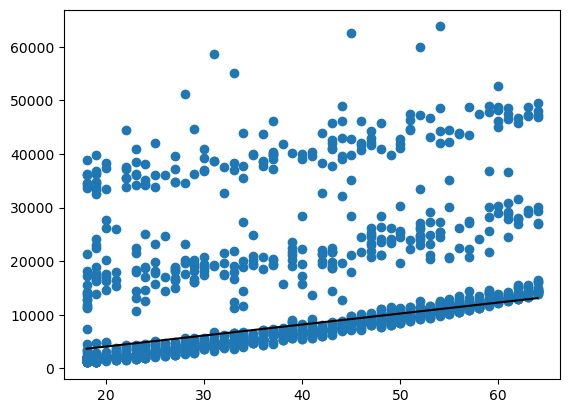

In [87]:
x_test = list(range(18,65,1))
y_test = [best_m*x + best_b for x in x_test]

plt.scatter(ages,costs)
plt.plot(x_test,y_test,'k')
plt.show

# The data in the plots above shows three distinct groups. What are the differences between the three groups? Does separating by group provide a better fit?

### First, check for a gender disparity

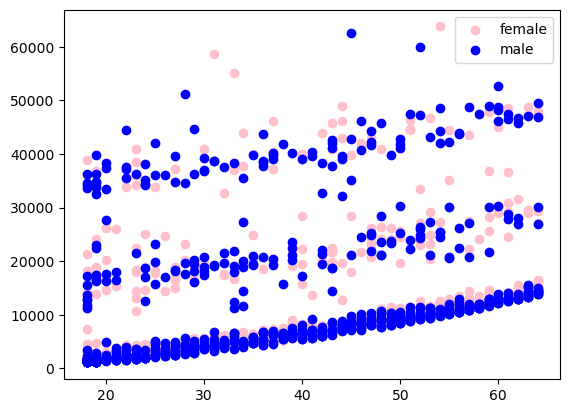

In [88]:
plt.scatter(female_ages,female_costs, color = "pink", label = "female")
plt.scatter(male_ages,male_costs, color = "blue", label = "male")
plt.legend()
plt.show()

## Data is still in three distinct groups without a clear difference between male and female. Another factor must be separating them, but there may still be a difference in male vs female groups.


In [89]:
male_average_cost = sum(male_costs)/len(male_costs)
female_average_cost = sum(female_costs)/len(female_costs)
overall_average_cost = sum(costs)/len(costs)

cost_avg_dict = {"overall_average":overall_average_cost,"male":male_average_cost, "female":female_average_cost}
print(cost_avg_dict)

{'overall_average': 13270.422265141257, 'male': 13956.751177721886, 'female': 12569.57884383534}


## Next, investigate smoker vs nonsmoker

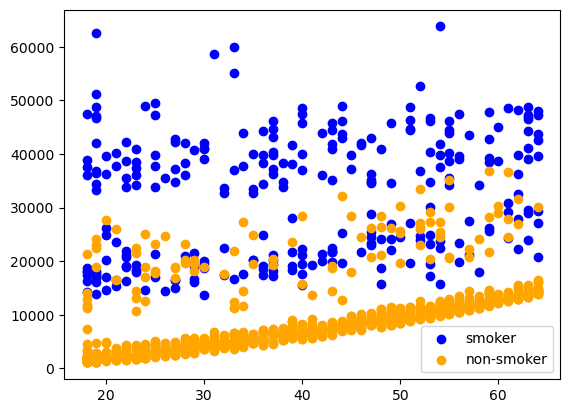

In [90]:
plt.scatter(smoker_ages,smoker_costs, color = 'blue', label = "smoker")
plt.scatter(nonsmoker_ages,nonsmoker_costs, color = 'orange', label = "non-smoker")
plt.legend()
plt.show()

## There is a much bigger difference. Now, will find the linear fit for both datasets to compare.

In [91]:
possible_sm_ms = [m for m in range(0,1000,5)]
possible_sm_bs = [b for b in range(5000,50000,10)]
smoker_age_cost_datapoints = list(zip(smoker_ages,smoker_costs))

smallest_sm_error = float("inf")
best_sm_m = 0
best_sm_b = 0

for m in possible_sm_ms:
    for b in possible_sm_bs:
        total_error = 0
        for point in smoker_age_cost_datapoints:
            point_error = calculate_linear_error(m,b,point)
            total_error = total_error + point_error
        if total_error < smallest_sm_error:
            smallest_sm_error = total_error
            best_sm_m = m
            best_sm_b = b

print(best_sm_m)
print(best_sm_b)
print(smallest_sm_error)

regression_model_dict["smoker"] = {"m":best_sm_m, "b":best_sm_b, "smallest_error_":smallest_sm_error}

205
26180
2748009.520899999


In [92]:
possible_nsm_ms = [m for m in range(0,2000,5)]
possible_nsm_bs = [b for b in range(0,10000,10)]
nonsmoker_age_cost_datapoints = list(zip(nonsmoker_ages,nonsmoker_costs))

smallest_nsm_error = float("inf")
best_nsm_m = 0
best_nsm_b = 0

for m in possible_nsm_ms:
    for b in possible_nsm_bs:
        total_error = 0
        for point in nonsmoker_age_cost_datapoints:
            point_error = calculate_linear_error(m,b,point)
            total_error = total_error + point_error
        if total_error < smallest_nsm_error:
            smallest_nsm_error = total_error
            best_nsm_m = m
            best_nsm_b = b

print(best_nsm_m)
print(best_nsm_b)
print(smallest_nsm_error)

regression_model_dict["nonsmoker"] = {"m":best_nsm_m, "b":best_nsm_b, "smallest_error_":smallest_nsm_error}

190
0
2631268.414619


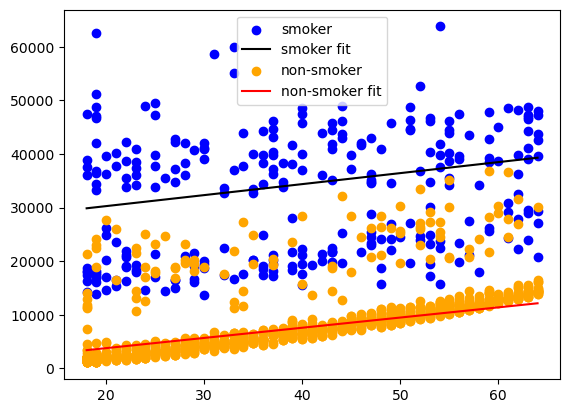

In [93]:
x_testsm = list(range(18,65,1))
y_testsm = [best_sm_m*x + best_sm_b for x in x_testsm]
y_testnsm = [best_nsm_m*x + best_nsm_b for x in x_testsm]

plt.scatter(smoker_ages,smoker_costs, color = 'blue', label = "smoker")
plt.plot(x_testsm,y_testsm,'k', label = "smoker fit")
plt.scatter(nonsmoker_ages,nonsmoker_costs, color = 'orange', label = "non-smoker")
plt.plot(x_testsm,y_testnsm, color = "red", label = "non-smoker fit")
plt.legend()
plt.show()

## Now will check the impact of region

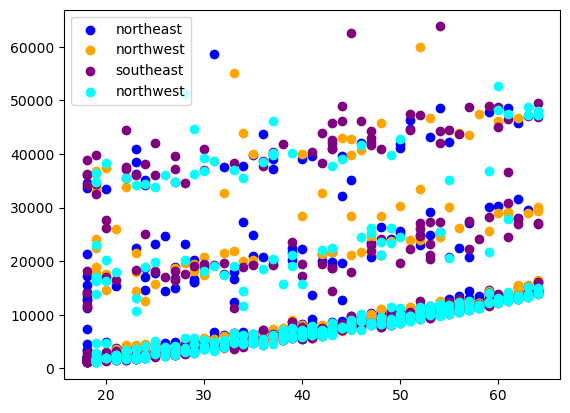

In [94]:
plt.scatter(northeast_ages,northeast_costs, color = 'blue', label = "northeast")
plt.scatter(northwest_ages,northwest_costs, color = 'orange', label = "northwest")
plt.scatter(southeast_ages,southeast_costs, color = 'purple', label = "southeast")
plt.scatter(southwest_ages,southwest_costs, color = 'cyan', label = "northwest")
plt.legend()
plt.show()

In [95]:
smoker_average_cost = sum(smoker_costs)/len(smoker_costs)
nonsmoker_average_cost = sum(nonsmoker_costs)/len(nonsmoker_costs)

cost_avg_dict["smoker"] = smoker_average_cost
cost_avg_dict["nonsmoker"] = nonsmoker_average_cost
print(cost_avg_dict)

{'overall_average': 13270.422265141257, 'male': 13956.751177721886, 'female': 12569.57884383534, 'smoker': 32050.23183153285, 'nonsmoker': 8434.268297856199}


## Not too different. Check the averages!

In [96]:
northeast_average_cost = sum(northeast_costs)/len(northeast_costs)
northwest_average_cost = sum(northwest_costs)/len(northwest_costs)
southeast_average_cost = sum(southeast_costs)/len(southeast_costs)
southwest_average_cost = sum(southwest_costs)/len(southwest_costs)

cost_avg_dict["northeast"] = northeast_average_cost
cost_avg_dict["northwest"] = northwest_average_cost
cost_avg_dict["southeast"] = southeast_average_cost
cost_avg_dict["southwest"] = southwest_average_cost
print(cost_avg_dict)

{'overall_average': 13270.422265141257, 'male': 13956.751177721886, 'female': 12569.57884383534, 'smoker': 32050.23183153285, 'nonsmoker': 8434.268297856199, 'northeast': 13406.3845163858, 'northwest': 12417.575373969228, 'southeast': 14735.411437609895, 'southwest': 12346.93737729231}


# Based on analysis up to this point, males, smokers, and southeasterners have the highest average costs, with smokers having the biggest differential from nonsmokers.

## Why is this? Do more males smoke? Do more smokers live in the southeast than other regions?

[]


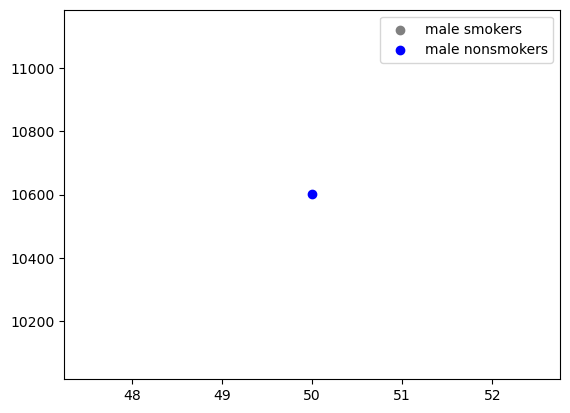

In [101]:
male_smokers_costs = []
male_smokers_ages = []
male_nonsmokers_costs = []
male_nonsmokers_ages = []

for row in male.values():
    if row["smoker"] == "yes":
        float_ms_costs = float(row["charges"])
        male_smokers_costs.append(float_ms_costs)
        float_ms_ages = float(row["age"])
        male_smokers_ages.append(float_ms_ages)
    if row["smoker"] == "no":
        float_mns_costs = float(row["charges"])
        male_nonsmokers_costs.append(float_mns_costs)
        float_mns_ages = float(row["age"])
        male_nonsmokers_ages.append(float_mns_ages)

print(male_smokers_ages)

plt.scatter(male_smokers_ages,male_smokers_costs, color = "gray", label = "male smokers")
plt.scatter(male_nonsmokers_ages,male_nonsmokers_costs, color = "blue", label = "male nonsmokers")
plt.legend()
plt.show()